
## Taller 1  : correlation And Scaler Data
## Signature : Machine Learning
### Teacher  : Roger Galindo
### Student  :Jorge E. Malambo


In [1]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt

# definir rutas de directorios
from pathlib import Path
# importar metodos para procesamiento del DataFrame
from sklearn.preprocessing import MinMaxScaler, StandardScaler

current_dir=Path('.').resolve()
project_dir=Path(current_dir).parent

<font color='blue'>Usando las base de datos de GCP - BigQuery --bigquery-public-data, se realiza un DataFrame a partir de una consulta de la base de datos en lenguaje SQL</font>

In [2]:
query = """
SELECT * FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` LIMIT 1000"""
dataframe=pd.read_gbq(query)
dataframe.head(10)

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,1635cc78e071c55379ba87d3d275a4f21333d213,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:30:00+00:00,2016-09-22 11:45:00+00:00,600,0.8,<NA>,<NA>,<NA>,<NA>,...,0.0,9.25,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
1,1e3168900f8090e1bab555b15210f6ad701af327,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:45:00+00:00,2016-09-22 12:00:00+00:00,960,7.6,<NA>,<NA>,<NA>,<NA>,...,0.0,21.50,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
2,c620405438b7bfcc6378f885f6aa56d1b8be9369,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 15:00:00+00:00,2016-09-22 15:45:00+00:00,3000,13.2,<NA>,<NA>,<NA>,<NA>,...,0.0,37.00,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
3,c8b56b9c599580efc1e4ffe36ac36cfb7ea85cbd,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 17:15:00+00:00,2016-09-22 17:45:00+00:00,2220,12.2,<NA>,<NA>,<NA>,<NA>,...,4.5,46.58,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
4,c876619a0a2869039533144d7105948e9cfc1951,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 21:00:00+00:00,2016-09-19 21:30:00+00:00,1560,15.6,<NA>,<NA>,<NA>,<NA>,...,4.0,52.40,Credit Card,Sun Taxi,NaN,NaN,None,NaN,NaN,None
5,de967d53bb59b1b0cbb5d31aae7e8699ed8b3505,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 21:45:00+00:00,2016-09-19 22:00:00+00:00,840,6.1,<NA>,<NA>,<NA>,<NA>,...,1.0,19.00,Cash,Sun Taxi,NaN,NaN,None,NaN,NaN,None
6,79e5e3d4aadabcceb226e8ddfea436a309b3a280,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 22:15:00+00:00,2016-09-19 22:45:00+00:00,1140,6.4,<NA>,<NA>,<NA>,<NA>,...,1.0,20.50,Cash,Sun Taxi,NaN,NaN,None,NaN,NaN,None
7,71c1c7092c5500dd8e704ce2784d7fbb87779d06,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 22:45:00+00:00,2016-09-19 23:00:00+00:00,900,5.7,<NA>,<NA>,<NA>,<NA>,...,0.0,17.50,Cash,Sun Taxi,NaN,NaN,None,NaN,NaN,None
8,0a4688d4c5fa8f59419f3761bf8642d7e1b960e8,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 23:00:00+00:00,2016-09-19 23:00:00+00:00,180,0.8,<NA>,<NA>,<NA>,<NA>,...,2.0,7.25,Cash,Sun Taxi,NaN,NaN,None,NaN,NaN,None
9,42fabc1888ef1546adb0681151f142df9c177f90,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 23:45:00+00:00,2016-09-20 00:00:00+00:00,540,1.8,<NA>,<NA>,<NA>,<NA>,...,1.0,9.25,Cash,Sun Taxi,NaN,NaN,None,NaN,NaN,None


<font color='blue'>
    De este DF para fines del taller se llamaran las columas que poseen datos numericos
</font>

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   unique_key              1000 non-null   object             
 1   taxi_id                 1000 non-null   object             
 2   trip_start_timestamp    1000 non-null   datetime64[ns, UTC]
 3   trip_end_timestamp      1000 non-null   datetime64[ns, UTC]
 4   trip_seconds            1000 non-null   Int64              
 5   trip_miles              1000 non-null   float64            
 6   pickup_census_tract     0 non-null      Int64              
 7   dropoff_census_tract    0 non-null      Int64              
 8   pickup_community_area   0 non-null      Int64              
 9   dropoff_community_area  0 non-null      Int64              
 10  fare                    1000 non-null   float64            
 11  tips                    1000 non-null   floa

<font color='blue'>
    Se realiza la lista de tipos de datos que se tendran en cuenta y la posterior selecion con el metodo select_dtypes
</font> 

In [4]:
numerics= ('int16','int32','int64','float16','float32','float64')
numeric_df= dataframe.select_dtypes(include=numerics)
numeric_df.head(10)

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN
5,840,6.1,<NA>,<NA>,<NA>,<NA>,18.00,0.00,0.0,1.0,19.00,NaN,NaN,NaN,NaN
6,1140,6.4,<NA>,<NA>,<NA>,<NA>,19.50,0.00,0.0,1.0,20.50,NaN,NaN,NaN,NaN
7,900,5.7,<NA>,<NA>,<NA>,<NA>,17.50,0.00,0.0,0.0,17.50,NaN,NaN,NaN,NaN
8,180,0.8,<NA>,<NA>,<NA>,<NA>,5.25,0.00,0.0,2.0,7.25,NaN,NaN,NaN,NaN
9,540,1.8,<NA>,<NA>,<NA>,<NA>,8.25,0.00,0.0,1.0,9.25,NaN,NaN,NaN,NaN


<font color='blue'>
    varias columnas del DF prensetan valores NA por lo cual no seran utiles para analizarlas, adicionamente la columna tolls parece tener solo cero, toca verificar para tambien no contar con esta columna
</font>

In [5]:
numeric_df["tolls"].value_counts()

0.0    907
Name: tolls, dtype: int64

lo que nos lleva a definir un listado de los nombres ce las columnas que requerimos

In [6]:
col = list()
for x in numeric_df.columns:
    col.append(x)
col

['trip_seconds',
 'trip_miles',
 'pickup_census_tract',
 'dropoff_census_tract',
 'pickup_community_area',
 'dropoff_community_area',
 'fare',
 'tips',
 'tolls',
 'extras',
 'trip_total',
 'pickup_latitude',
 'pickup_longitude',
 'dropoff_latitude',
 'dropoff_longitude']

In [7]:
for x in [14,13,12,11,8,5,4,3,2]:
    del col[x]
col

['trip_seconds', 'trip_miles', 'fare', 'tips', 'extras', 'trip_total']

# <font color='blue'> 1 Histograma y Cajas para Todas las Variables </font>

<font color='blue'>
    para facilitar la graficas se ralizara la definicion de un metodo que grafique tanto los datos por un diagrama de barras como por un grafico de caja y bigotes con valores atipicos 
</font>

In [8]:
def graficar_BarraYCaja (data, col, plot_name):
                   
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # assigning a graph to each ax
    sns.boxplot(data[col], ax=ax_box)
    sns.histplot(data=data, x=col, bins=30, ax=ax_hist)
 
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')

    title = plot_name.split("-")
    title = " ".join([e for e in title])

    plt.suptitle('Grafica '+ title)###
    ax_hist.grid()


    plot_path = os.path.join(project_dir, 'reports', 'plots', plot_name)
    #f.savefig(plot_path)
    

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

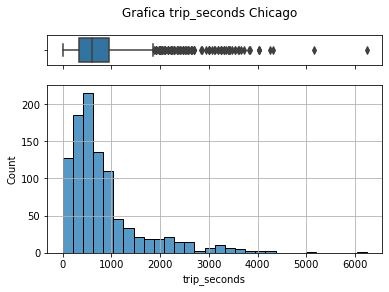

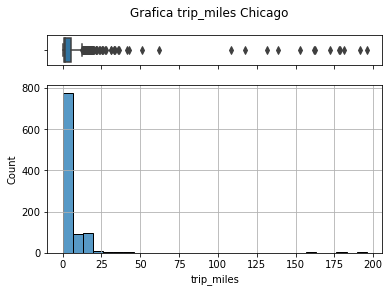

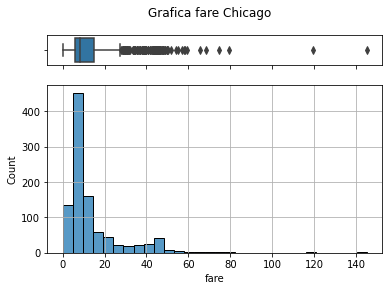

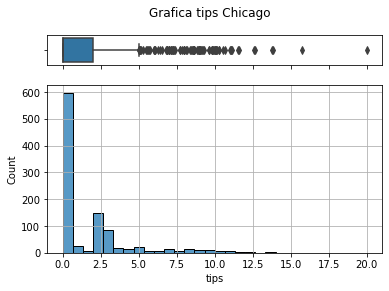

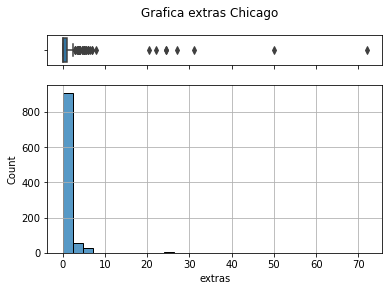

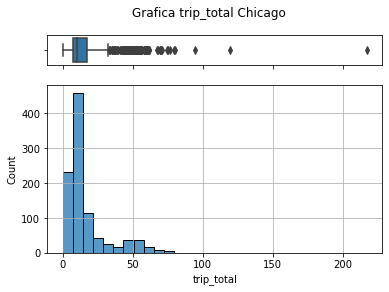

In [9]:
for x in col:
    if numeric_df[x].isna().sum() == len (numeric_df):
        print("{} only contains nulls values".format(x))
        continue
    try:
        graficar_BarraYCaja(
            data = numeric_df, 
            col  = x, 
            plot_name = x + " Chicago"
        )
    except:
        #print ("No se Puede Graficar la columna: {}".format(col))
        continue


# <font color='blue'> 2. Hallar la corelacion y diagrama de dispersion de las demas variables con respecto a trip seconds</font> 

In [10]:
numeric_df[col].corr()

,trip_seconds,trip_miles,fare,tips,extras,trip_total
trip_seconds,1.000000,0.388041,0.811545,0.465293,0.223759,0.777201
trip_miles,0.388041,1.000000,0.483143,0.066270,0.188213,0.438722
fare,0.811545,0.483143,1.000000,0.495063,0.401036,0.971256
tips,0.465293,0.066270,0.495063,1.000000,0.170404,0.601553
extras,0.223759,0.188213,0.401036,0.170404,1.000000,0.561654
trip_total,0.777201,0.438722,0.971256,0.601553,0.561654,1.000000


<font color='blue'>
    Graficas de Puntos de las variables del Data frame de taxis de Chicago, con el fin de observar visualmente si tenemos correlacion.
</font>

In [11]:
#https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
paleta=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 
 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 
 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r', 
 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight',
 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

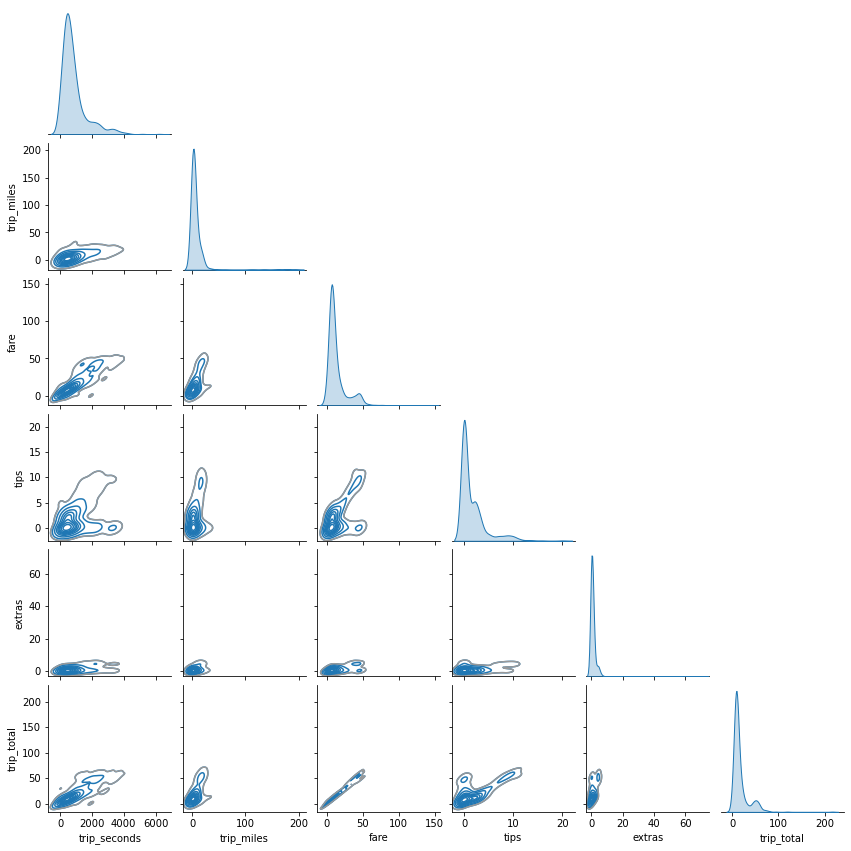

In [12]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
g=sns.pairplot(data=numeric_df[col],
               kind="kde", #plot to a layered kernel density estimate (KDE)
               corner=True, #para trazar solo el triángulo inferior
               height=2
               #hue='categoria',   # hue colorea las variable medinte un mapeo semántico que posea el DF ejemplo: sexo, tipologia, edad, etc
               #palette=paleta[14]   # paleta de colores
              )
g.map_lower(sns.kdeplot, levels=2, color=".6")

"\nplot_path = os.path.join(project_dir, 'reports', 'plots', 'filename.png')\n\nplt.savefig(plot_path)\n"

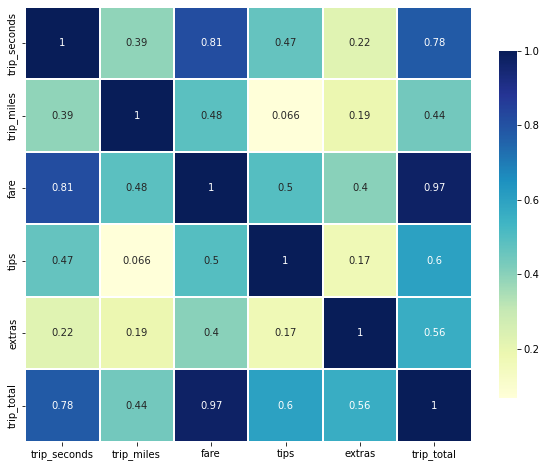

In [13]:
correlations = numeric_df[col].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlations, 
            cmap="YlGnBu",#'tab20'#
            annot = True,
            linewidth=0.3, 
            cbar_kws={"shrink": .8}
           )
#para grabar
"""
plot_path = os.path.join(project_dir, 'reports', 'plots', 'filename.png')

plt.savefig(plot_path)
"""

| Rango                 | tipo Correlacion |
|-----------------------|------------------|
| [+/- 0.96 , +/- 1.00] |Perfecta          |
| [+/- 0.85 , +/- 0.95] |Fuerte            |
| [+/- 0.70 , +/- 0.84] |Significativa     |
| [+/- 0.50 , +/- 0.69] |Moderada          |
| [+/- 0.20 , +/- 0,49] |Debil             |
| [+/- 0.10 , +/- 0.19] |Muy Debil         |
| [+/- 0.00 , +/- 0.09] |Nula              |


+ las Variables con perfecta correlacion son : ***Trip_total & Fare, las Variables*** 
+ con Significativa correlacion son : ***Trip_seconds & Fare , Trip_seconds & Trip_Total***

# <font color='blue'>3. Construir mapa de calor  y ScatterMatrix, con las variables numéricas transformadas a logaritmo</font>

In [14]:
# en la siguiente linea sacaremos logaritmo natural de las variables de data frame
log_1 = np.log(numeric_df[col[0]] + 1)
log_2 = np.log(numeric_df[col[1]] + 1)
log_3 = np.log(numeric_df[col[2]] + 1)
log_4 = np.log(numeric_df[col[3]] + 1)
log_5 = np.log(numeric_df[col[4]] + 1)
log_6 = np.log(numeric_df[col[5]] + 1)

In [15]:
# Generar un nuevo data frame con las columnas mencionadas anateriormente
log_variables = pd.concat([log_1, log_2, log_3, log_4, log_5, log_6], axis=1)
log_variables.head(10)

,trip_seconds,trip_miles,fare,tips,extras,trip_total
0,6.398595,0.587787,2.047693,1.098612,0.000000,2.327278
1,6.867974,2.151762,3.113515,0.000000,0.000000,3.113515
2,8.006701,2.653242,3.637586,0.000000,0.000000,3.637586
3,7.705713,2.580217,3.597312,1.957274,1.704748,3.862413
4,7.353082,2.809403,3.695110,2.266958,1.609438,3.977811
5,6.734592,1.960095,2.944439,0.000000,0.693147,2.995732
6,7.03966,2.001480,3.020425,0.000000,0.693147,3.068053
7,6.803505,1.902108,2.917771,0.000000,0.000000,2.917771
8,5.198497,0.587787,1.832581,0.000000,1.098612,2.110213
9,6.293419,1.029619,2.224624,0.000000,0.693147,2.327278


In [16]:
log_variables.rename(
    columns = {
        'trip_seconds' : 'log_trip_seconds',
        'trip_miles': 'log_trip_miles',
        'fare' : 'log_fare',
        'tips' : 'log_tips',
        'extras' : 'log_extras',
        'trip_total' : 'log_trip_total',
    },
    inplace=True)
log_variables.head()

,log_trip_seconds,log_trip_miles,log_fare,log_tips,log_extras,log_trip_total
0,6.398595,0.587787,2.047693,1.098612,0.000000,2.327278
1,6.867974,2.151762,3.113515,0.000000,0.000000,3.113515
2,8.006701,2.653242,3.637586,0.000000,0.000000,3.637586
3,7.705713,2.580217,3.597312,1.957274,1.704748,3.862413
4,7.353082,2.809403,3.695110,2.266958,1.609438,3.977811


In [17]:
col_logaritmos= list()
for x in log_variables.columns:
    col_logaritmos.append(x)
col_logaritmos

['log_trip_seconds',
 'log_trip_miles',
 'log_fare',
 'log_tips',
 'log_extras',
 'log_trip_total']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

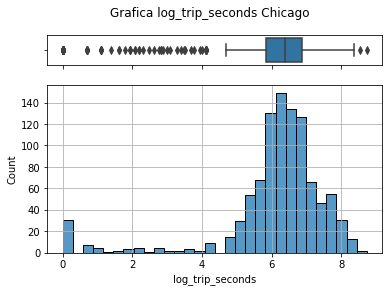

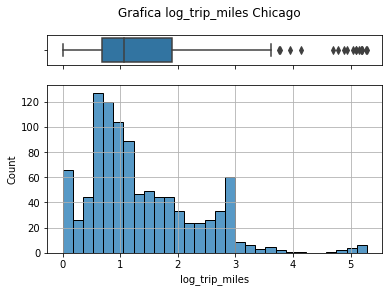

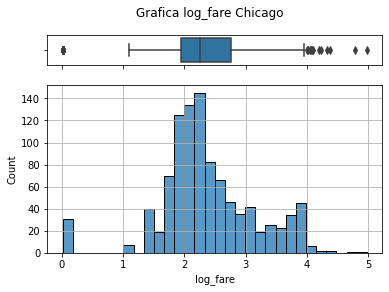

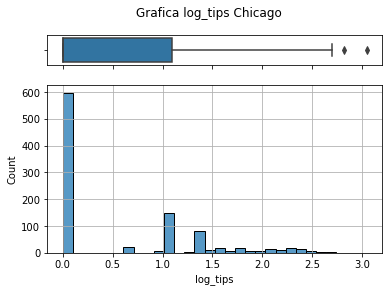

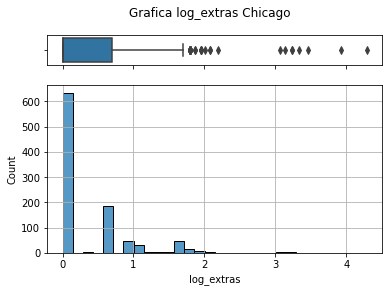

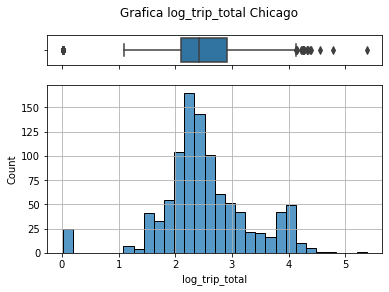

In [18]:
for x in col_logaritmos:
    if log_variables[x].isna().sum() == len (log_variables):
        print("{} only contains nulls values".format(x))
        continue
    try:
        graficar_BarraYCaja(
            data = log_variables, 
            col  = x, 
            plot_name = x + " Chicago"
        )
    except:
        #print ("No se Puede Graficar la columna: {}".format(col))
        continue

‘bar’ or ‘barh’ for bar plots
‘hist’ for histogram
‘box’ for boxplot
‘kde’ or 'density' for density plots
‘area’ for area plots
‘scatter’ for scatter plots
‘hexbin’ for hexagonal bin plots
‘pie’ for pie plots

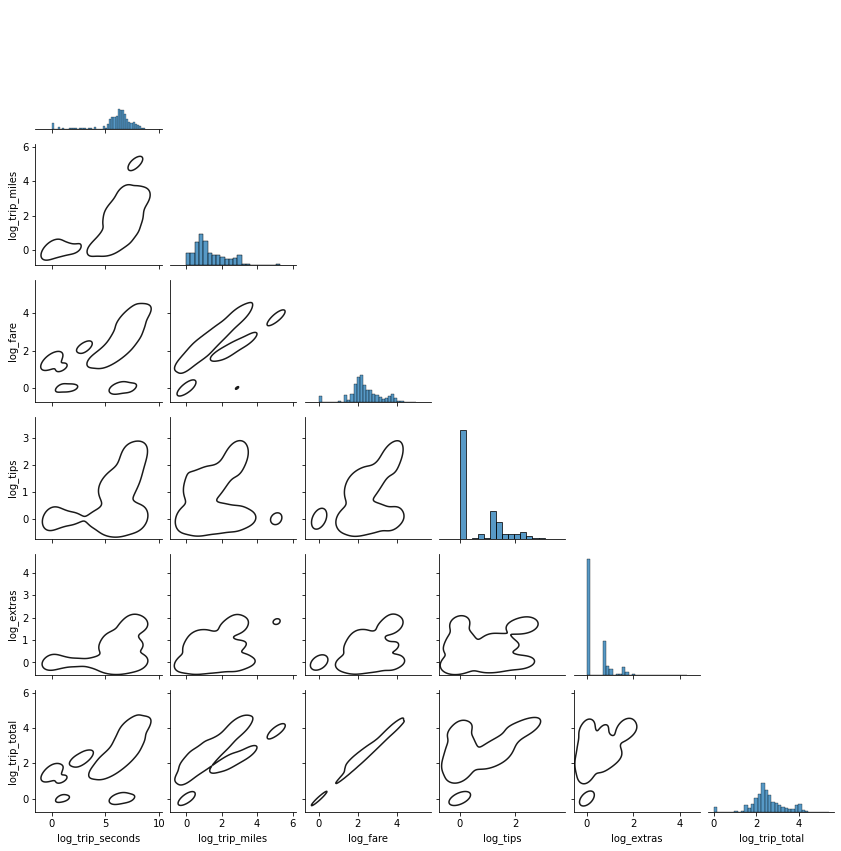

In [19]:
g=sns.pairplot(data=log_variables[col_logaritmos],
               kind='hexbin', 
               corner=True,
               height=2
               )
g.map_lower(sns.kdeplot, levels=2, color=".1")

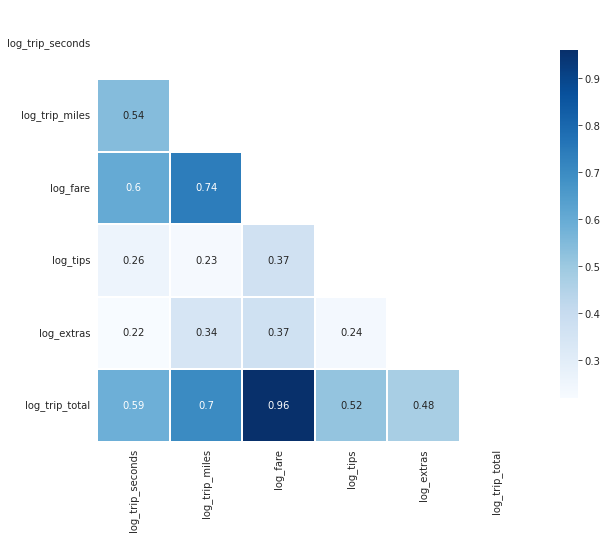

In [20]:
correlations = log_variables[col_logaritmos].corr()


mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(correlations, 
                     mask=mask, 
                     cmap="Blues", 
                     linewidth=2,
                     square=True,
                     annot = True,
                     cbar_kws={"shrink": .8}
                     #vmax=.9,#'tab20'#
                    )

+ las Variables con perfecta correlacion son : ***log_Trip_total & log_Fare***
+ las Variables con Significativa correlacion son : ***log_Trip_miles & log_trip_total , log_Trip_miles & log_Trip_fare***

# 4. Estudio de correlaciones con Standard Scaler y MinMax Scaler

# transformacion $MinMax$
es buena si la varible a estudiar esta acotada

## ${x}'=\frac{x-x_{min}}{x_{max}-x_{min}}$



In [21]:
log_minmax_scaler = MinMaxScaler().fit(log_variables[col_logaritmos])
log_data_min_max_scaled = log_minmax_scaler.transform(log_variables[col_logaritmos])

In [22]:
log_minmax_scaled = pd.DataFrame(columns=log_variables[col_logaritmos].columns, data=log_data_min_max_scaled)
log_minmax_scaled.head()

,log_trip_seconds,log_trip_miles,log_fare,log_tips,log_extras,log_trip_total
0,0.732197,0.111266,0.409707,0.360849,0.000000,0.431167
1,0.785909,0.407323,0.624001,0.000000,0.000000,0.577456
2,0.916214,0.502251,0.729370,0.000000,0.000000,0.674966
3,0.881772,0.488428,0.721273,0.642884,0.397335,0.716798
4,0.841420,0.531812,0.740936,0.744602,0.375120,0.738269


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

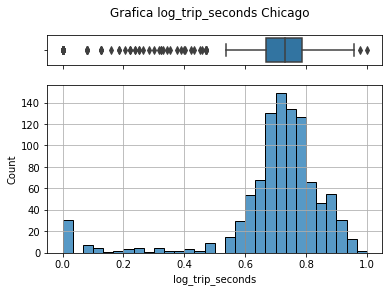

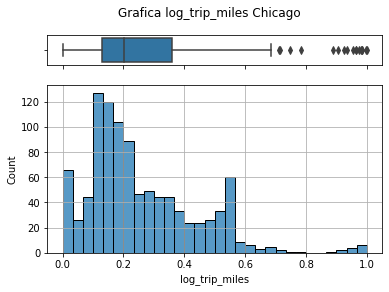

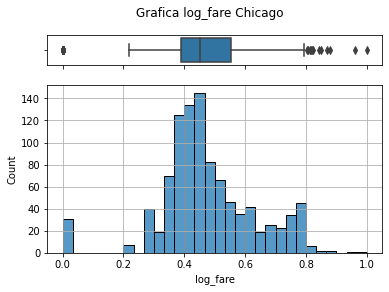

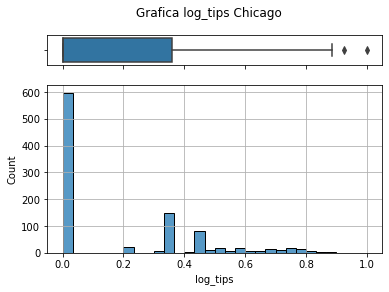

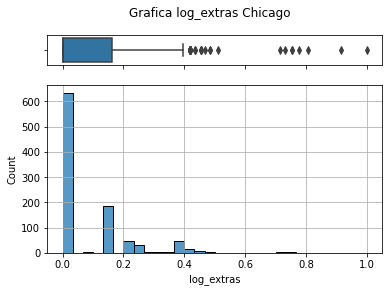

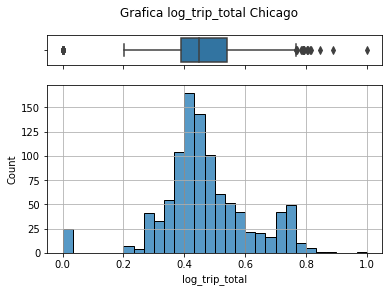

In [23]:
for x in col_logaritmos:
    if log_minmax_scaled[x].isna().sum() == len (log_variables):
        print("{} only contains nulls values".format(x))
        continue
    try:
        graficar_BarraYCaja(
            data = log_minmax_scaled, 
            col  = x, 
            plot_name = x + " Chicago"
        )
    except:
        #print ("No se Puede Graficar la columna: {}".format(col))
        continue

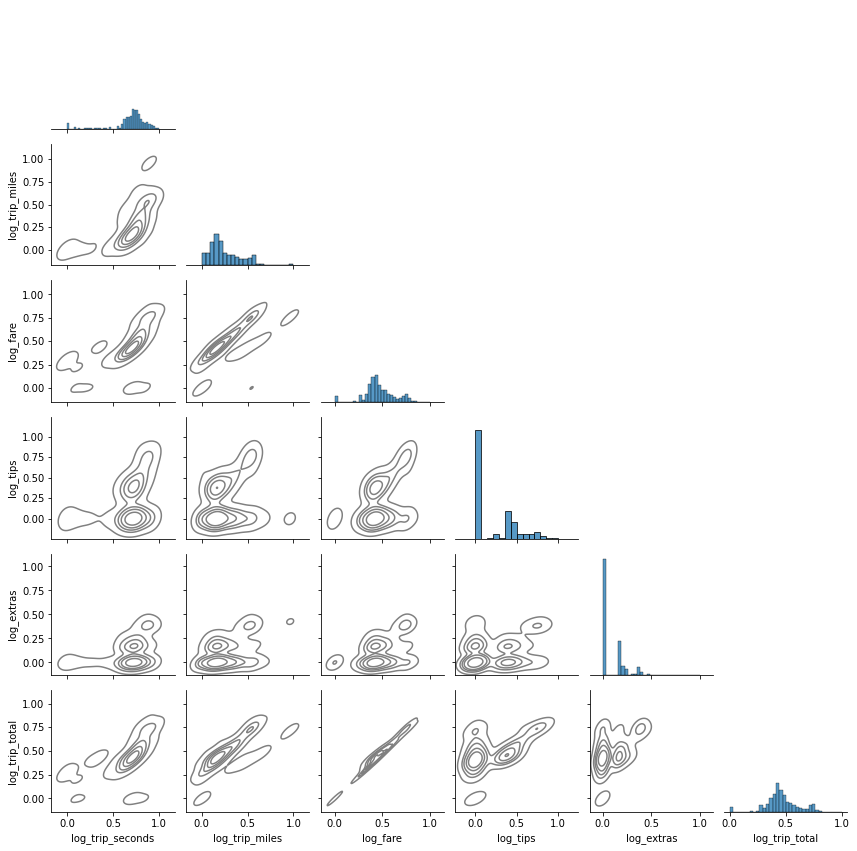

In [24]:
g=sns.pairplot(data=log_minmax_scaled,
               kind='pie', 
               corner=True,
               height=2
               )
g.map_lower(sns.kdeplot, levels=6, color=".5")


In [25]:
import random

In [26]:
#https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
cMap=['viridis', 'plasma', 'inferno', 'magma', 'cividis','Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn','binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper','PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic','twilight', 'twilight_shifted', 'hsv','Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c','flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar']

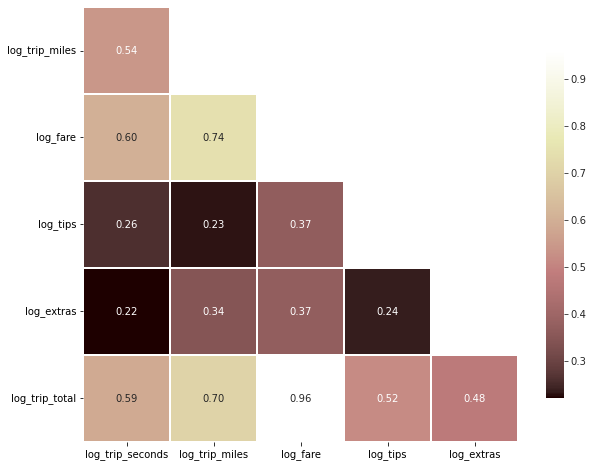

In [27]:
correlations = log_minmax_scaled [col_logaritmos].corr()


f, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(correlations, dtype=np.bool))
mask = mask[1:, :-1]
corr = correlations.iloc[1:,:-1].copy()
#mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
   
    sns.heatmap(corr, 
                 mask=mask,
                 fmt=".2f",
                 #cmap ='twilight_shifted',
                cmap =cMap[random.randint(0, len(cMap))+1], 
                 linewidth=2,
                 square=True,
                 annot = True,
                 cbar_kws={"shrink": .8}
                 #vmax=.9,#'tab20'#
                )
plt.yticks(rotation=0)
plt.show()

+ las Variables con perfecta correlacion son : ***log_Trip_total & log_Fare***
+ las Variables con Significativa correlacion son : ***log_Trip_miles & log_trip_total , log_Trip_miles & log_Trip_fare***

# transformacion $Standard$ 
Prefiere que la distribucion natural de los datos es similar,
es decir que se mantengas la media ($\mu$) y la desviacion estandar($\sigma$), o que sean parecidas.



## ${x}'=\frac{x-\mu}{\sigma}$

In [28]:
log_STD_scaler = StandardScaler().fit(log_variables[col_logaritmos])
log_data_STD_scaled = log_STD_scaler.transform(log_variables[col_logaritmos])

In [29]:
log_STD_scaled = pd.DataFrame(columns=log_variables[col_logaritmos].columns, data=log_data_STD_scaled)
log_STD_scaled.head()

,log_trip_seconds,log_trip_miles,log_fare,log_tips,log_extras,log_trip_total
0,0.186215,-0.801507,-0.411266,0.656155,-0.634985,-0.253508
1,0.480541,0.823728,0.944124,-0.752117,-0.634985,0.729560
2,1.194582,1.344851,1.610576,-0.752117,-0.634985,1.384829
3,1.005847,1.268965,1.559361,1.756843,2.203760,1.665940
4,0.784729,1.507128,1.683729,2.153815,2.045050,1.810227


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

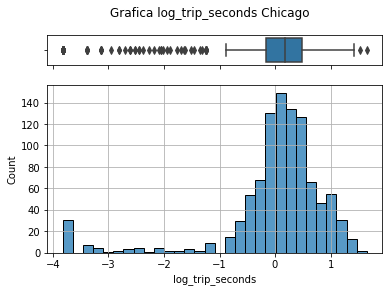

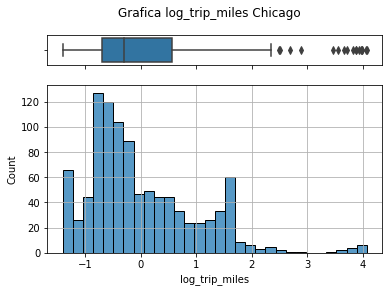

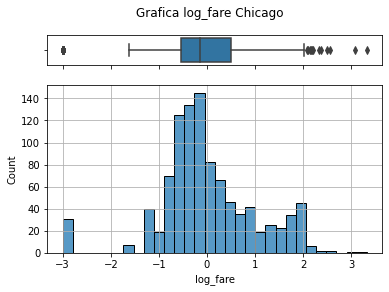

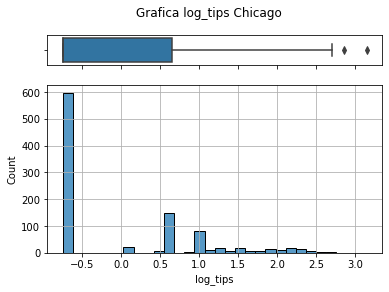

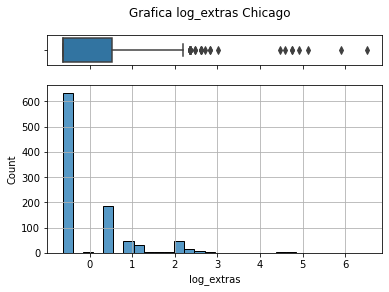

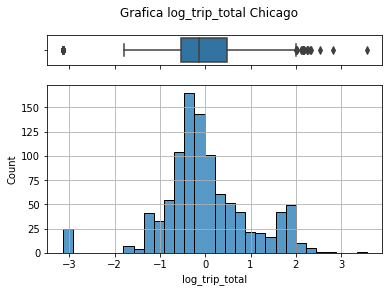

In [30]:
for x in col_logaritmos:
    if log_STD_scaled[x].isna().sum() == len (log_variables):
        print("{} only contains nulls values".format(x))
        continue
    try:
        graficar_BarraYCaja(
            data = log_STD_scaled, 
            col  = x, 
            plot_name = x + " Chicago"
        )
    except:
        #print ("No se Puede Graficar la columna: {}".format(col))
        continue

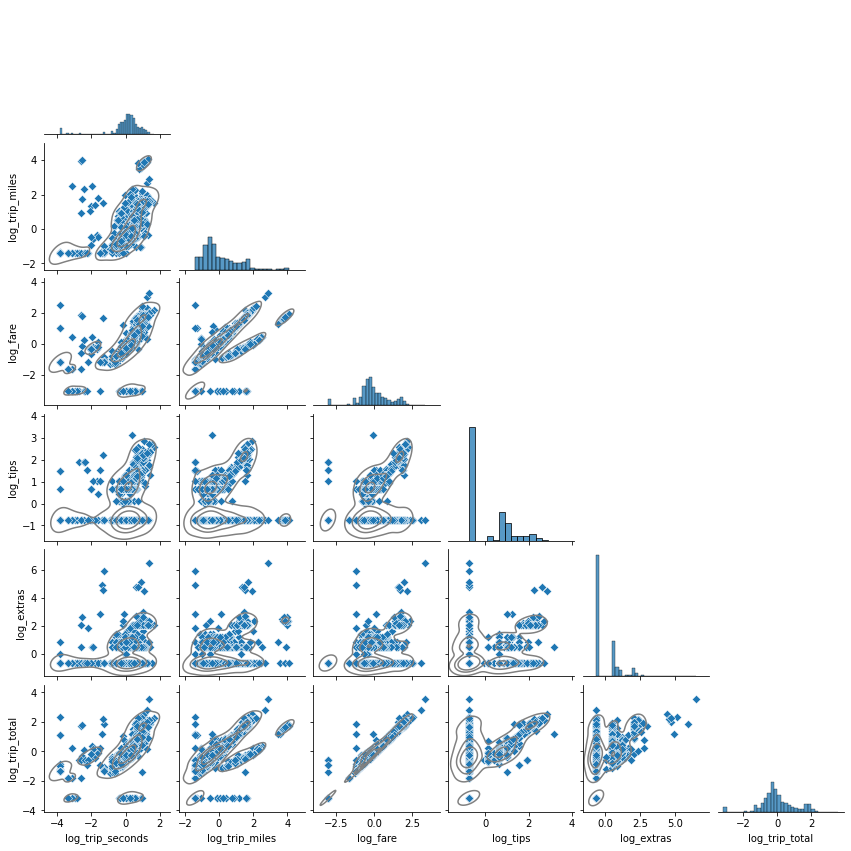

In [31]:
#sns.pairplot(data=log_STD_scaled)

g=sns.pairplot(data=log_STD_scaled,
                markers="D",
               corner=True,
               height=2
               )
g.map_lower(sns.kdeplot, levels=4, color=".5")


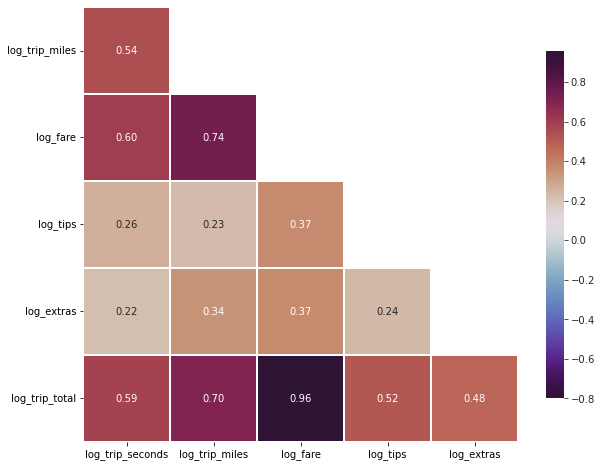

In [32]:
correlations = log_STD_scaled [col_logaritmos].corr()

f, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(correlations, dtype=np.bool))
mask = mask[1:, :-1]
corr = correlations.iloc[1:,:-1].copy()
#mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
   
    sns.heatmap(corr, 
                mask=mask,
                fmt=".2f",
                cmap ='twilight_shifted',
                vmin=-0.8,
                #cmap =cMap[random.randint(0, len(cMap))+1], 
                linewidth=2,
                square=True,
                annot = True,
                cbar_kws={"shrink": .8}
                #vmax=.9,#'tab20'#
                )
plt.yticks(rotation=0)
plt.show()


#sns.heatmap(correlations, cmap='Greens', annot = True)

+ las Variables con perfecta correlacion son : ***log_Trip_total & log_Fare***
+ las Variables con Significativa correlacion son : ***log_Trip_miles & log_trip_total , log_Trip_miles & log_Trip_fare***